In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Decision Tree Classification

In [2]:
# Importing preprocessed data
data= pd.read_csv('../Data/data_preprocessed.csv', index_col=0)

data_x= data.drop(labels=["Potability"],axis=1).copy(deep=True)
data_y = pd.DataFrame(data, columns=['Potability'])

display(data_x)
display(data_y)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.199101,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,7.060069,129.422921,18630.057858,6.635246,344.894384,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,334.706620,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,20927.833607,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,340.951154,392.449580,19.903225,66.977633,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,326.676061,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,332.463189,402.883113,11.168946,77.488213,4.708658


,Potability
0,0
1,0
2,0
3,0
4,0
...,...
3271,1
3272,1
3273,1
3274,1


# Splitting Train and Test Data

In [3]:
#Training and Test Data splitting
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.25,random_state=42)

scaler=StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

print(f'X train shape: {x_train.shape}')
print(f'Y train shape: {y_train.shape}')
print(f'X test shape: {x_test.shape}')
print(f'Y test shape: {y_test.shape}')

X train shape: (2431, 9)
Y train shape: (2431, 1)
X test shape: (811, 9)
Y test shape: (811, 1)


In [4]:
param_grid = {"max_depth":[*range(2, 50, 3)],
              "criterion":["gini", "entropy", "log_loss"],
              "max_features" : ["sqrt", "log2"],
              "random_state" : [*range(2, 50, 5)]
              }
kff_clf = KFold(n_splits=10, shuffle=True)
clf_grid_cv = DecisionTreeClassifier()
grid_search_cv= GridSearchCV(clf_grid_cv,param_grid,cv=kff_clf)
grid_search_cv.fit(x_train,y_train)

print(f"The best parameter: {grid_search_cv.best_params_}")
print(f"The best estimator: {grid_search_cv.best_estimator_}")
print(f"The best index: {grid_search_cv.best_index_}")
print(f"The best score: {grid_search_cv.best_score_}")

The best parameter: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'random_state': 2}
The best estimator: DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=2)
The best index: 20
The best score: 0.6203214598934088


Feature importances: [0.11299563 0.17517779 0.04071756 0.12255315 0.4148379  0.04857236
 0.03386957 0.03959028 0.01168578]


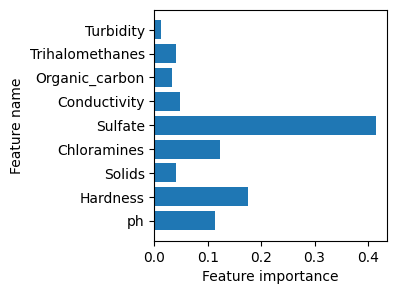

In [5]:
# a function to plot a bar graph of important features
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)
    plt.show()

clf_dtc_model =  DecisionTreeClassifier(criterion = 'entropy',
                                        max_depth = 5,
                                        random_state = 37,
                                        max_features = 'sqrt'
                                        )
clf_dtc_model.fit(x_train,y_train)
print(f'Feature importances: {clf_dtc_model.feature_importances_}')

plt.figure(figsize=(3,3), dpi=100)
plot_feature_importances(clf_dtc_model, data_x.columns)
# chart_png(plt,"Feature_Importance_chart_Decision tree classifier")

Classification Report :-


,precision,recall,f1-score,support
0,0.664901,0.970986,0.789308,517.000000
1,0.732143,0.139456,0.234286,294.000000
accuracy,0.669544,0.669544,0.669544,0.669544
macro avg,0.698522,0.555221,0.511797,811.000000
weighted avg,0.689277,0.669544,0.588104,811.000000


Accuracy Score: 0.6695437731196054


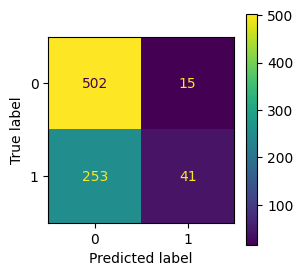

In [6]:
y_predict =clf_dtc_model.predict(x_test)
print("Classification Report :-")
display(pd.DataFrame(classification_report(y_test, y_predict, output_dict=True)).transpose())
cm=confusion_matrix(y_test, y_predict, labels=clf_dtc_model.classes_)
# Model Accuracy, how often is the classifier correct?
print("Accuracy Score:",accuracy_score(y_test, y_predict))
confusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix= cm,
                                                display_labels=clf_dtc_model.classes_)
fig, ax = plt.subplots(figsize=(3,3))
confusionMatrixDisplay.plot(ax=ax)
plt.show()

roc_auc_score for DecisionTree:  0.581086593244648


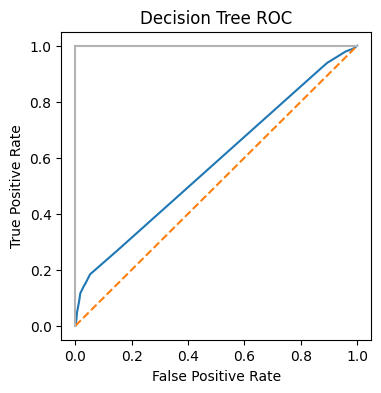

In [7]:
y_score1 = clf_dtc_model.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

plt.subplots(1, figsize=(4,4))
plt.title('Decision Tree ROC')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KNN Classification

In [8]:
knn = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid_search_cv = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search_cv.fit(x_train, y_train.values.ravel())

print(f"The best parameter: {grid_search_cv.best_params_}")
print(f"The best estimator: {grid_search_cv.best_estimator_}")
print(f"The best index: {grid_search_cv.best_index_}")
print(f"The best score: {grid_search_cv.best_score_}")

Fitting 10 folds for each of 30 candidates, totalling 300 fits
The best parameter: {'n_neighbors': 29}
The best estimator: KNeighborsClassifier(n_neighbors=29)
The best index: 28
The best score: 0.6351396478445659


Classification Report :-


,precision,recall,f1-score,support
0,0.677557,0.922631,0.781327,517.000000
1,0.626168,0.227891,0.334165,294.000000
accuracy,0.670777,0.670777,0.670777,0.670777
macro avg,0.651863,0.575261,0.557746,811.000000
weighted avg,0.658928,0.670777,0.619224,811.000000


Accuracy Score: 0.6707768187422934


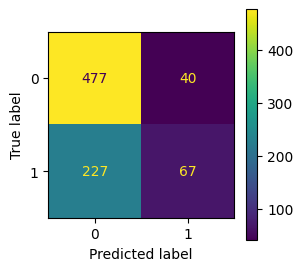

In [9]:
clf_knn_model = KNeighborsClassifier(n_neighbors=29)
clf_knn_model.fit(x_train, y_train.values.ravel())

y_predict =clf_knn_model.predict(x_test)
print("Classification Report :-")
display(pd.DataFrame(classification_report(y_test, y_predict, output_dict=True)).transpose())
cm=confusion_matrix(y_test, y_predict, labels=clf_knn_model.classes_)
# Model Accuracy, how often is the classifier correct?
print("Accuracy Score:",accuracy_score(y_test, y_predict))
confusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix= cm,
                                                display_labels=clf_knn_model.classes_)
fig, ax = plt.subplots(figsize=(3,3))
confusionMatrixDisplay.plot(ax=ax)
plt.show()

roc_auc_score for KNN:  0.6058402084237952


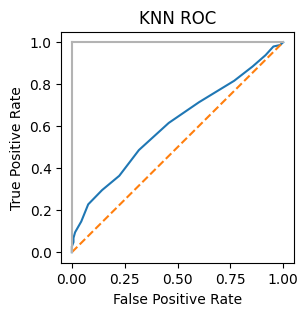

In [10]:
y_score1 = clf_knn_model.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score1))

plt.subplots(1, figsize=(3,3))
plt.title('KNN ROC')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Classifier

In [11]:
param_grid = {"n_estimators": [*range(1, 10, 2)],
              "max_depth":[*range(1, 20, 4)],
              "criterion":["gini", "entropy", "log_loss"],
              "max_features" : ["sqrt", "log2"],
              "random_state" : [*range(1, 50, 10)]
              }
# kff_clf = KFold(n_splits=10, shuffle=True)
rfc = RandomForestClassifier()

# defining parameter range
grid_search_cv = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy', return_train_score=False)

# fitting the model for grid search
grid_search_cv.fit(x_train, y_train.values.ravel())

print(f"The best parameter: {grid_search_cv.best_params_}")
print(f"The best estimator: {grid_search_cv.best_estimator_}")
print(f"The best index: {grid_search_cv.best_index_}")
print(f"The best score: {grid_search_cv.best_score_}")

The best parameter: {'criterion': 'entropy', 'max_depth': 13, 'max_features': 'sqrt', 'n_estimators': 9, 'random_state': 11}
The best estimator: RandomForestClassifier(criterion='entropy', max_depth=13, n_estimators=9,
                       random_state=11)
The best index: 421
The best score: 0.6339113240550612


Classification Report :-


,precision,recall,f1-score,support
0,0.679507,0.852998,0.756432,517.000000
1,0.530864,0.292517,0.377193,294.000000
accuracy,0.649815,0.649815,0.649815,0.649815
macro avg,0.605186,0.572758,0.566813,811.000000
weighted avg,0.625622,0.649815,0.618952,811.000000


Accuracy Score: 0.6498150431565968


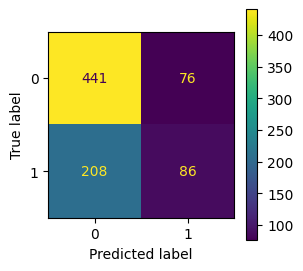

In [12]:
clf_rfc_model = RandomForestClassifier(criterion = 'entropy', max_depth = 13, max_features = 'sqrt', n_estimators = 9, random_state = 11)
clf_rfc_model.fit(x_train, y_train.values.ravel())

y_predict =clf_rfc_model.predict(x_test)
print("Classification Report :-")
display(pd.DataFrame(classification_report(y_test, y_predict, output_dict=True)).transpose())
cm=confusion_matrix(y_test, y_predict, labels=clf_rfc_model.classes_)
# Model Accuracy, how often is the classifier correct?
print("Accuracy Score:",accuracy_score(y_test, y_predict))
confusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix= cm,
                                                display_labels=clf_rfc_model.classes_)
fig, ax = plt.subplots(figsize=(3,3))
confusionMatrixDisplay.plot(ax=ax)
plt.show()

roc_auc_score for rfc:  0.5863925841129488


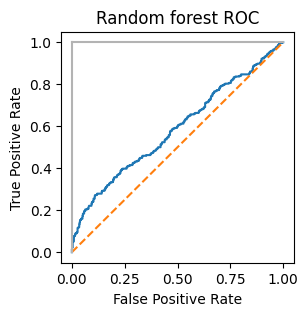

In [13]:
y_score1 = clf_rfc_model.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score for rfc: ', roc_auc_score(y_test, y_score1))

plt.subplots(1, figsize=(3,3))
plt.title('Random forest ROC')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()